## <span style="color:#2F749F;"><strong>📦 Sesión práctica 4: Introducción a datos atípicos</strong></span>



## <span style="color:black;"><strong>Datos del estudiante</strong></span>



estefania.hurtado@udea.edu.co - Estefanía Hurtado Reina

luisa.jimenez1@udea.edu.co - Luisa Fernanda Jimenez

Relacione sus datos y los del compañero de trabajo

# <span style="color:#2F749F;"><strong>Ejercicio 1: Intervalo IQR</strong></span>


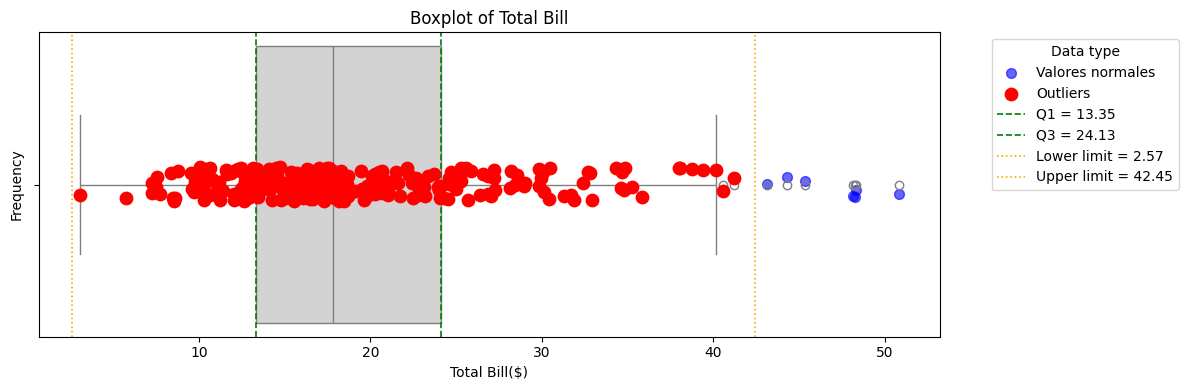

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

tips = sns.load_dataset("tips")
total_bill = tips["total_bill"].values
Q1, Q3 = np.percentile(total_bill, [25, 75])
IQR = Q3 - Q1
lim_inf = Q1 - IQR #No es usual que la persona consumidora pague 0 o menos de 0 $
lim_sup = Q3 + 1.7 * IQR
normales_iqr= total_bill[(total_bill < lim_inf) | (total_bill > lim_sup)]
outliers_iqr = total_bill[(total_bill >= lim_inf) & (total_bill <= lim_sup)]

plt.figure(figsize=(12,4))
sns.boxplot(x=total_bill, color="lightgray")
plt.scatter(normales_iqr, np.random.uniform(-0.05, 0.05, size=len(normales_iqr)),
            color="blue", s=50, alpha=0.6, label="Valores normales")
plt.scatter(outliers_iqr, np.random.uniform(-0.05, 0.05, size=len(outliers_iqr)),
            color="red", s=80, zorder=5, label="Outliers")
plt.axvline(Q1, color="green", linestyle="--", linewidth=1.2, label=f"Q1 = {Q1:.2f}")
plt.axvline(Q3, color="green", linestyle="--", linewidth=1.2, label=f"Q3 = {Q3:.2f}")
plt.axvline(lim_inf, color="orange", linestyle=":", linewidth=1.2, label=f"Lower limit = {lim_inf:.2f}")
plt.axvline(lim_sup, color="orange", linestyle=":", linewidth=1.2, label=f"Upper limit = {lim_sup:.2f}")

plt.xlabel('Total Bill($)')
plt.ylabel('Frequency')
plt.title('Boxplot of Total Bill')
plt.legend(title='Data type', bbox_to_anchor=(1.05,1),loc='upper left')
plt.tight_layout()
plt.show()


De acuerdo con el gráfico de caja de bigotes, podemos notar que posiblemente los datos están sesgados hacia el lado derecho, este comportamiento podría explicarse porque no es usual que una cuenta de cobro sea gratuita o negativa. Adicionalmente, en los valores más altos de dinero se dispersan más los datos, es decir que los valores menos frecuentes y extremos son los de cuentas de pago más altas, por encima de los 40$. Aunque estos valores sean identificados como outliers, no sería adecuado eliminarlos porque son valores que aportan información reelevante sobre el cosumidor o persona que paga.

# <span style="color:#2F749F;"><strong>Ejercicio 2: Graficos de dispersión</strong></span>

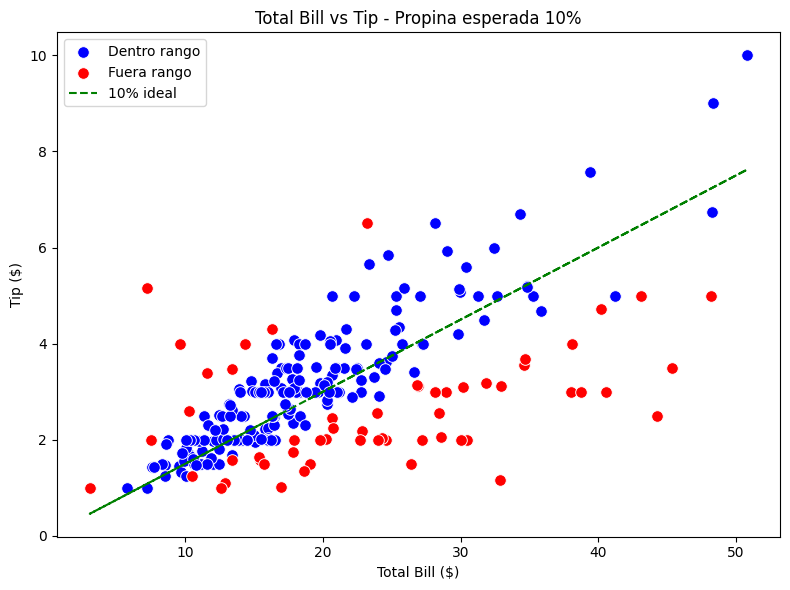

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Dataset
tips = sns.load_dataset("tips")

# Variables
x = tips["total_bill"].values
y = tips["tip"].values

# Línea de referencia: 10% del total_bill
expected_tips = 0.15 * x

# Definir un rango de tolerancia (ej: +8% de la factura)
lower_bound = 0.12 * x
upper_bound = 0.25 * x

# Identificar puntos fuera de rango
outliers = (y < lower_bound) | (y > upper_bound)

# Gráfico
plt.figure(figsize=(8,6))

# Puntos dentro de rango (azules)
sns.scatterplot(x=x[~outliers], y=y[~outliers], color="blue", s=70, label="Dentro rango")

# Puntos fuera de rango (rojos)
sns.scatterplot(x=x[outliers], y=y[outliers], color="red", s=70, label="Fuera rango")

# Línea del 10% (verde)
plt.plot(x, expected_tips, color="green", linestyle="--", label="10% ideal")

plt.xlabel('Total Bill ($)')
plt.ylabel('Tip ($)')
plt.title('Total Bill vs Tip - Propina esperada 10%')
plt.legend()
plt.tight_layout()
plt.show()


Con base en el gráfico de dispersión, se logra visualizar una tendencia lineal creciente que se mueve sobre un umbral del 15% (que es la propina recomendada en Estados Unidos). Se analiza con un márgen inferior del 3% y superior al 10%, suponiendo que la gente está dispuesta a pagar un % más alto del 15% en propina. Es de gran interés analizar la cantidad de cuentas registradas menores al 15% de propina, ya que es obligatorio el pago, evidenciando que la mayoría son de valores altos, en contraste de los pocos que se encuentran por encima del 25% que son cuentas de menor valor.

# <span style="color:#2F749F;"><strong>Ejercicio 3: Histogramas y funciones de densidad</strong></span>



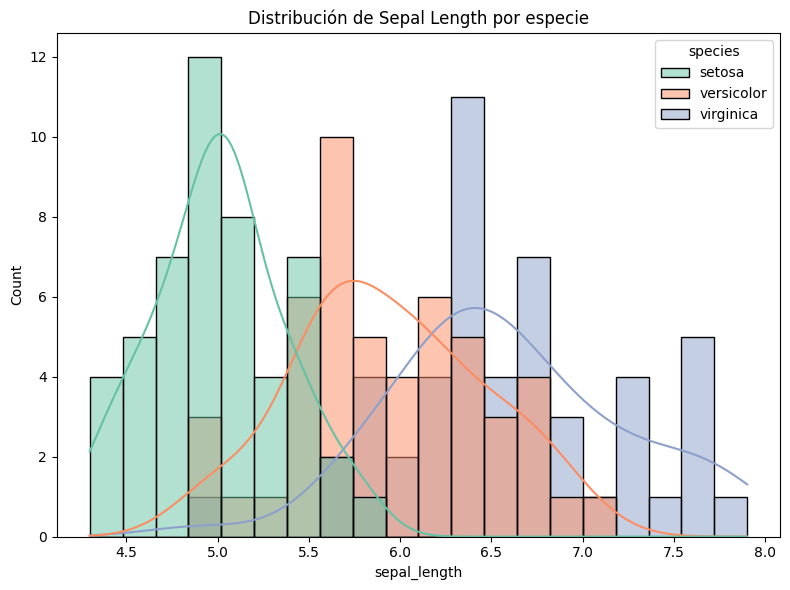

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar dataset Iris
iris = sns.load_dataset("iris")

plt.figure(figsize=(8,6))
sns.histplot(data=iris, x="sepal_length", hue="species", bins=20, kde=True, palette="Set2", alpha=0.5)
plt.title("Distribución de Sepal Length por especie")
plt.tight_layout()
plt.show()


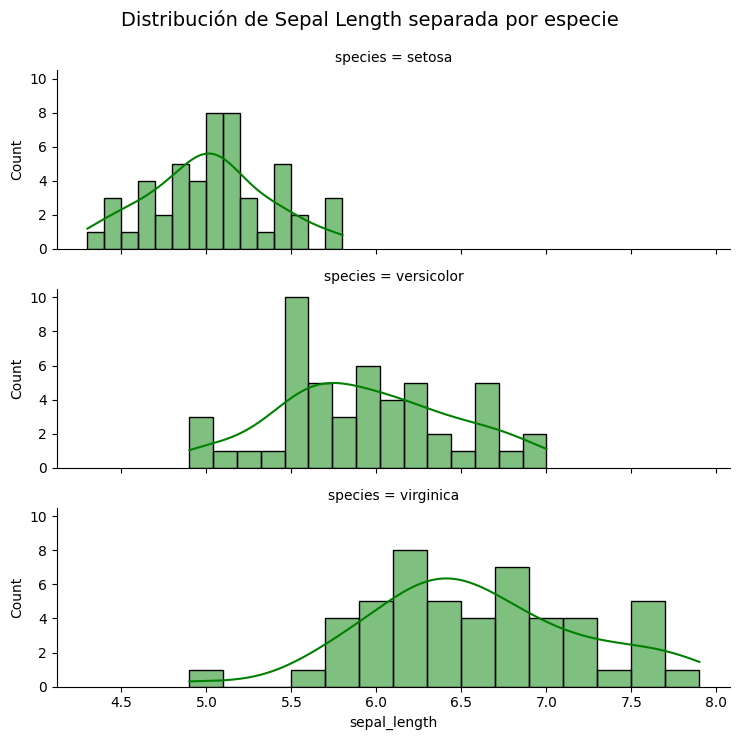

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

iris = sns.load_dataset("iris")

g = sns.FacetGrid(iris, row="species", height=2.5, aspect=3)
g.map(sns.histplot, "sepal_length", bins=15, kde=True, color="green")

# Agregar título general
g.fig.suptitle("Distribución de Sepal Length separada por especie", fontsize=14)

# Ajustar espacio para que no se sobreponga
g.fig.subplots_adjust(top=0.9)

plt.show()



En referencia con las gráficas, podemos ver que en cuanto a las especies "setosa" y "versicolor" no hya indicios notorios de datos atípicos, ya que las gráficas se encuentran centradas y sin colas considerables. En cuento a la especie "virginica" se podría decir que puden haber datos atípicos, ya que tiene una cola hacia la izqueirda y con algunos vacíos en los conteos. Sin embargo, cabe anotar que en la gráfica de "setosa" hay una descontinuidad en la cola derecha, que se debería analizar.

# <span style="color:#2F749F;"><strong>Ejercicio 4: Z-Score</strong></span>


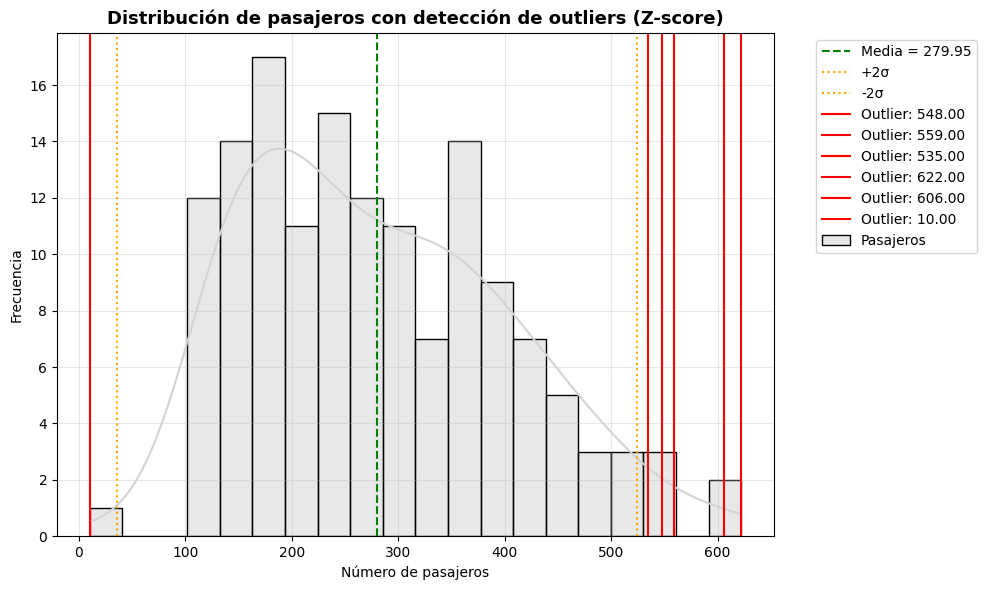

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import zscore

# Dataset
flights = sns.load_dataset("flights")
x = flights["passengers"].values

# Agregar valores atípicos manuales
x = np.append(x, [10, 500])

# Calcular Z-scores
z_scores = zscore(x)
outliers = x[np.abs(z_scores) > 2]

# Gráfico
plt.figure(figsize=(10, 6))
sns.histplot(x=x, bins=20, kde=True, color="lightgray", label="Pasajeros")

# Media y ±2σ
plt.axvline(np.mean(x), color="green", linestyle="--", label=f"Media = {np.mean(x):.2f}")
plt.axvline(np.mean(x) + 2*np.std(x), color="orange", linestyle=":", label="+2σ")
plt.axvline(np.mean(x) - 2*np.std(x), color="orange", linestyle=":", label="-2σ")

# Outliers
for out in outliers:
    plt.axvline(out, color="red", linestyle="-", label=f"Outlier: {out:.2f}")

# Personalización
plt.title("Distribución de pasajeros con detección de outliers (Z-score)", fontsize=13, weight="bold")
plt.xlabel("Número de pasajeros")
plt.ylabel("Frecuencia")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


Con base en la gráfica que ilustra los datos atípicos con +- desviaciones estándar, es evidente la presencia de datos atípicos basados en esta métrica, con una presencia notoria en la cola derecha, que hace mover la media y alargar la cola hacia ese mismo lado, en comparación con la izquierda. Para un total de 5 datos hacia la derecha y uno hacia la izquierda. Dado el contexto, puede deberse a épocas del año de mayor y menor demanda de viajeros.

# <span style="color:#2F749F;"><strong>Ejercicio 5: K-means</strong></span>


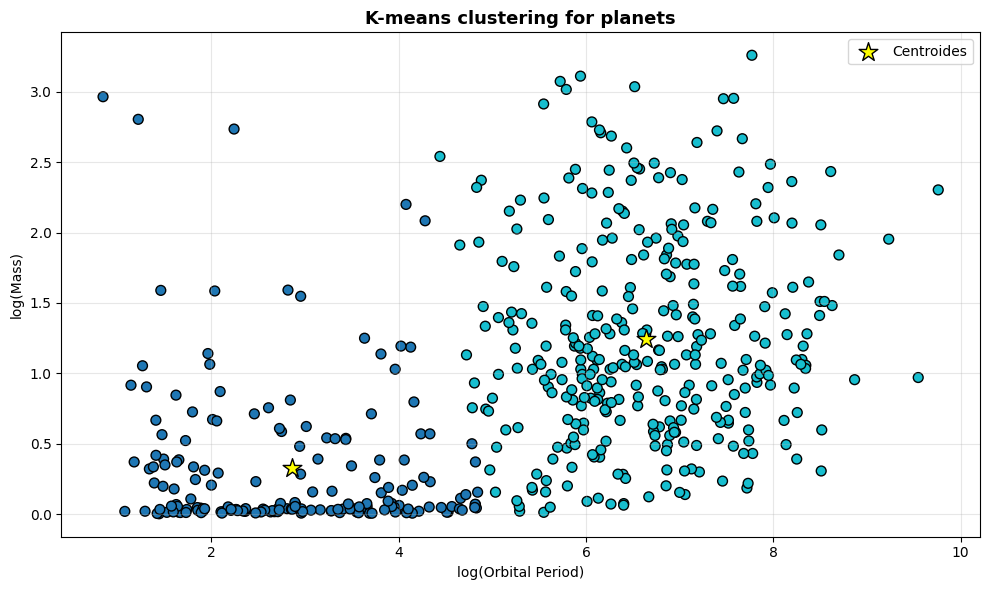

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

# Cargar y transformar datos
planets = sns.load_dataset("planets").dropna(subset=["orbital_period", "mass"])
X = planets[["orbital_period", "mass"]].values
X = np.log1p(X)  # Transformación logarítmica para estabilizar escala

# K-means con más de un cluster
kmeans = KMeans(n_clusters=2, random_state=42).fit(X)
labels_kmeans = kmeans.labels_

# Crear figura
fig, ax = plt.subplots(figsize=(10, 6))

# Puntos por cluster
scatter = ax.scatter(X[:, 0], X[:, 1], c=labels_kmeans, cmap="tab10", s=50, edgecolor="k")

# Centroides
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
           c="yellow", s=200, edgecolor="black", marker="*", label="Centroides")

# Estética
ax.set_title("K-means clustering for planets", fontsize=13, weight="bold")
ax.set_xlabel("log(Orbital Period)")
ax.set_ylabel("log(Mass)")
ax.legend(loc="upper right")
ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()



Con base en el gráfico, puede decirse que aunque hay dispersión, se observa que los planetas con períodos orbitales más largos tienden a mostrar mayor variabilidad en la masa y en los períodos cortos, la mayoría tiene masas bajas o medias. El cluster que agrupa los periodos orbitales cortos y masa alta tienen datos más alejados del centroide, es decir, valores atípicos más extremos.


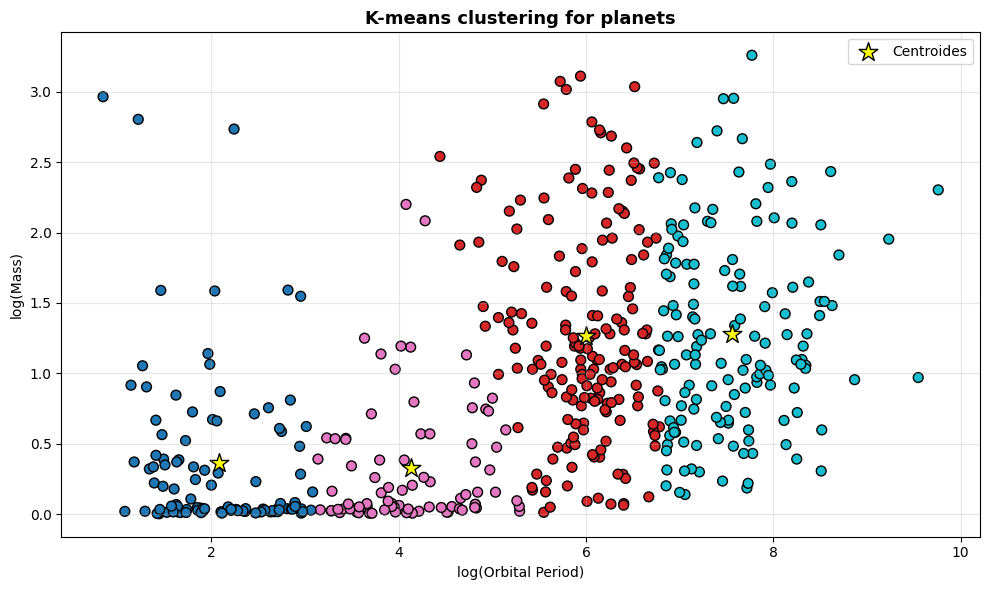

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

# Cargar y transformar datos
planets = sns.load_dataset("planets").dropna(subset=["orbital_period", "mass"])
X = planets[["orbital_period", "mass"]].values
X = np.log1p(X)  # Transformación logarítmica para estabilizar escala

# K-means con más de un cluster
kmeans = KMeans(n_clusters=4, random_state=42).fit(X)
labels_kmeans = kmeans.labels_

# Crear figura
fig, ax = plt.subplots(figsize=(10, 6))

# Puntos por cluster
scatter = ax.scatter(X[:, 0], X[:, 1], c=labels_kmeans, cmap="tab10", s=50, edgecolor="k")

# Centroides
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
           c="yellow", s=200, edgecolor="black", marker="*", label="Centroides")

# Estética
ax.set_title("K-means clustering for planets", fontsize=13, weight="bold")
ax.set_xlabel("log(Orbital Period)")
ax.set_ylabel("log(Mass)")
ax.legend(loc="upper right")
ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()

Haciendo el análisis con un número mayor de clúster se puede confirmar el anterior análisis y es que los datos están contenidos en la parte inferior con un menos número de masa y que a medida que va incrementando el periodo orbital se van dispersando y creciendo el tamaño de la masa.